# EDA HAPPINESS

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#한글폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path="C:\\Windows\\Fonts\\malgun.ttf" #윈도우 os폰트 경로
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
matplotlib.rc('font',family=font_name)
plt.rc('axes', unicode_minus=False) #(matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화 ,아스키코드 마이너스 사용)

## 01. 데이터 수집 및 로딩

In [8]:
df_2015 = pd.read_csv('data/2015.csv')
df_2019 = pd.read_csv('data/2019.csv')


In [9]:
print(df_2015.columns)
print(df_2019.columns)


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [10]:
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## 데이터 병합

In [12]:
import pandas as pd
# 1. Country 이름 통일
df_2019 = df_2019.rename(columns={'Country or region': 'Country'})

# 2. Region 정보 추출
region_map = df_2015[['Country', 'Region']]

# 3. 2019년도에 Region 추가 (left join)
df_2019 = pd.merge(df_2019, region_map, on='Country', how='left')


In [13]:
# 4. 컬럼명 정리 (Dystopia 포함)
df_2015 = df_2015.rename(columns={
    'Happiness Rank': 'Rank_2015',
    'Happiness Score': 'Score_2015',
    'Economy (GDP per Capita)': 'GDP_2015',
    'Family': 'Family_2015',
    'Health (Life Expectancy)': 'Health_2015',
    'Freedom': 'Freedom_2015',
    'Trust (Government Corruption)': 'Corruption_2015',
    'Generosity': 'Generosity_2015',
    'Dystopia Residual': 'Dystopia_2015'
})[['Country', 'Region', 'Rank_2015', 'Score_2015', 'GDP_2015', 'Family_2015',
     'Health_2015', 'Freedom_2015', 'Corruption_2015', 'Generosity_2015', 'Dystopia_2015']]



In [14]:
# 5. 2019 컬럼 정리
df_2019 = df_2019.rename(columns={
    'Overall rank': 'Rank_2019',
    'Score': 'Score_2019',
    'GDP per capita': 'GDP_2019',
    'Social support': 'Social_2019',
    'Healthy life expectancy': 'Health_2019',
    'Freedom to make life choices': 'Freedom_2019',
    'Perceptions of corruption': 'Corruption_2019',
    'Generosity': 'Generosity_2019'
})[['Country', 'Region', 'Rank_2019', 'Score_2019', 'GDP_2019', 'Social_2019',
     'Health_2019', 'Freedom_2019', 'Corruption_2019', 'Generosity_2019']]


In [15]:
# 6. 병합
merged_df = pd.merge(df_2015, df_2019, on=['Country', 'Region'], how='inner')





In [16]:
# 7. 변화량 계산
merged_df['Score_Diff'] = merged_df['Score_2019'] - merged_df['Score_2015']
merged_df['GDP_Diff'] = merged_df['GDP_2019'] - merged_df['GDP_2015']
merged_df['Rank_Diff'] = merged_df['Rank_2015'] - merged_df['Rank_2019']


# 8. 저장
merged_df.to_csv('data/merged_happiness_2015_2019.csv', index=False)

# 9. 확인
print("✅ 저장 완료! 'data/merged_happiness_2015_2019.csv'")
print(merged_df.head())

✅ 저장 완료! 'data/merged_happiness_2015_2019.csv'
       Country          Region  Rank_2015  Score_2015  GDP_2015  Family_2015  \
0  Switzerland  Western Europe          1       7.587   1.39651      1.34951   
1      Iceland  Western Europe          2       7.561   1.30232      1.40223   
2      Denmark  Western Europe          3       7.527   1.32548      1.36058   
3       Norway  Western Europe          4       7.522   1.45900      1.33095   
4       Canada   North America          5       7.427   1.32629      1.32261   

   Health_2015  Freedom_2015  Corruption_2015  Generosity_2015  ...  \
0      0.94143       0.66557          0.41978          0.29678  ...   
1      0.94784       0.62877          0.14145          0.43630  ...   
2      0.87464       0.64938          0.48357          0.34139  ...   
3      0.88521       0.66973          0.36503          0.34699  ...   
4      0.90563       0.63297          0.32957          0.45811  ...   

   Score_2019  GDP_2019  Social_2019  Health_

## 데이터 로딩

In [17]:
h_merged=pd.read_csv('data/merged_happiness_2015_2019.csv')
h_merged

,Country,Region,Rank_2015,Score_2015,GDP_2015,Family_2015,Health_2015,Freedom_2015,Corruption_2015,Generosity_2015,...,Score_2019,GDP_2019,Social_2019,Health_2019,Freedom_2019,Corruption_2019,Generosity_2019,Score_Diff,GDP_Diff,Rank_Diff
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,7.480,1.452,1.526,1.052,0.572,0.343,0.263,-0.107,0.05549,-5
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,7.494,1.380,1.624,1.026,0.591,0.118,0.354,-0.067,0.07768,-2
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,7.600,1.383,1.573,0.996,0.592,0.410,0.252,0.073,0.05752,1
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,7.554,1.488,1.582,1.028,0.603,0.341,0.271,0.032,0.02900,1
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,7.278,1.365,1.505,1.039,0.584,0.308,0.285,-0.149,0.03871,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,...,3.334,0.359,0.711,0.614,0.555,0.411,0.217,-0.131,0.13692,2
145,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,4.883,0.393,0.437,0.397,0.349,0.082,0.175,1.543,0.10635,53
146,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,...,3.462,0.619,0.378,0.440,0.013,0.141,0.331,0.456,-0.04420,7
147,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,...,3.775,0.046,0.447,0.380,0.220,0.180,0.176,0.870,0.03070,12


In [18]:
h_merged.shape

(149, 22)

In [19]:
h_merged['Dystopia_2015']

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
144    0.67042
145    1.63328
146    0.32858
147    1.83302
148    1.56726
Name: Dystopia_2015, Length: 149, dtype: float64

## 02. 데이터 구조 및 변수 이해

In [20]:
h_merged.columns

Index(['Country', 'Region', 'Rank_2015', 'Score_2015', 'GDP_2015',
       'Family_2015', 'Health_2015', 'Freedom_2015', 'Corruption_2015',
       'Generosity_2015', 'Dystopia_2015', 'Rank_2019', 'Score_2019',
       'GDP_2019', 'Social_2019', 'Health_2019', 'Freedom_2019',
       'Corruption_2019', 'Generosity_2019', 'Score_Diff', 'GDP_Diff',
       'Rank_Diff'],
      dtype='object')

In [21]:
h_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          149 non-null    object 
 1   Region           149 non-null    object 
 2   Rank_2015        149 non-null    int64  
 3   Score_2015       149 non-null    float64
 4   GDP_2015         149 non-null    float64
 5   Family_2015      149 non-null    float64
 6   Health_2015      149 non-null    float64
 7   Freedom_2015     149 non-null    float64
 8   Corruption_2015  149 non-null    float64
 9   Generosity_2015  149 non-null    float64
 10  Dystopia_2015    149 non-null    float64
 11  Rank_2019        149 non-null    int64  
 12  Score_2019       149 non-null    float64
 13  GDP_2019         149 non-null    float64
 14  Social_2019      149 non-null    float64
 15  Health_2019      149 non-null    float64
 16  Freedom_2019     149 non-null    float64
 17  Corruption_2019 

## 03. 데이터 요약 및 기술 통계

In [22]:
h_merged.describe()

,Rank_2015,Score_2015,GDP_2015,Family_2015,Health_2015,Freedom_2015,Corruption_2015,Generosity_2015,Dystopia_2015,Rank_2019,Score_2019,GDP_2019,Social_2019,Health_2019,Freedom_2019,Corruption_2019,Generosity_2019,Score_Diff,GDP_Diff,Rank_Diff
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,79.369128,5.378289,0.846230,0.992332,0.634892,0.429376,0.141567,0.236949,2.096953,77.570470,5.433872,0.914315,1.214946,0.732060,0.393544,0.110456,0.184503,0.055584,0.068086,1.798658
std,46.125175,1.157782,0.404755,0.277737,0.247618,0.148194,0.119494,0.127827,0.563781,45.350326,1.111243,0.392603,0.296852,0.238555,0.142276,0.095006,0.096646,0.511478,0.064118,19.847043
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,1.000000,3.083000,0.026000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.103000,-0.259490,-85.000000
25%,39.000000,4.518000,0.546490,0.851880,0.467210,0.328180,0.061460,0.145740,1.758730,38.000000,4.548000,0.619000,1.058000,0.555000,0.305000,0.047000,0.108000,-0.227000,0.042860,-10.000000
50%,79.000000,5.253000,0.901980,1.035160,0.698050,0.434500,0.105830,0.216840,2.090660,77.000000,5.425000,0.960000,1.274000,0.795000,0.418000,0.085000,0.176000,0.021000,0.066560,1.000000
75%,119.000000,6.295000,1.154060,1.223930,0.813250,0.546040,0.179220,0.311050,2.465310,117.000000,6.198000,1.237000,1.454000,0.884000,0.508000,0.140000,0.252000,0.358000,0.096140,13.000000
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,155.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.453000,0.566000,1.543000,0.438920,53.000000


In [23]:
!pip install tabulate


In [24]:
import pandas as pd

# Rank 관련 컬럼은 제외한 수치형 변수 목록
numeric_cols = [
    'Score_2015', 'GDP_2015', 'Family_2015', 'Health_2015',
    'Freedom_2015', 'Corruption_2015', 'Generosity_2015', 'Dystopia_2015',
    'Score_2019', 'GDP_2019', 'Social_2019', 'Health_2019',
    'Freedom_2019', 'Corruption_2019', 'Generosity_2019',
    'Score_Diff', 'GDP_Diff'
]

# 통계 요약 계산
summary_df = merged_df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T

# 컬럼 이름 한글로 변경
summary_df.columns = ['평균', '중앙값', '표준편차', '최솟값', '최댓값']

# 예쁘게 출력 (소수점 둘째자리까지)
summary_df.round(2).style.set_caption("수치형 변수 요약 통계 (순위 제외)").format("{:.2f}")




,평균,중앙값,표준편차,최솟값,최댓값
Score_2015,5.38,5.25,1.16,2.84,7.59
GDP_2015,0.85,0.90,0.40,0.00,1.69
Family_2015,0.99,1.04,0.28,0.00,1.40
Health_2015,0.63,0.70,0.25,0.00,1.03
Freedom_2015,0.43,0.43,0.15,0.00,0.67
Corruption_2015,0.14,0.11,0.12,0.00,0.55
Generosity_2015,0.24,0.22,0.13,0.00,0.80
Dystopia_2015,2.10,2.09,0.56,0.33,3.60
Score_2019,5.43,5.42,1.11,3.08,7.77
GDP_2019,0.91,0.96,0.39,0.03,1.68


## 05. 변수 분포 시각화

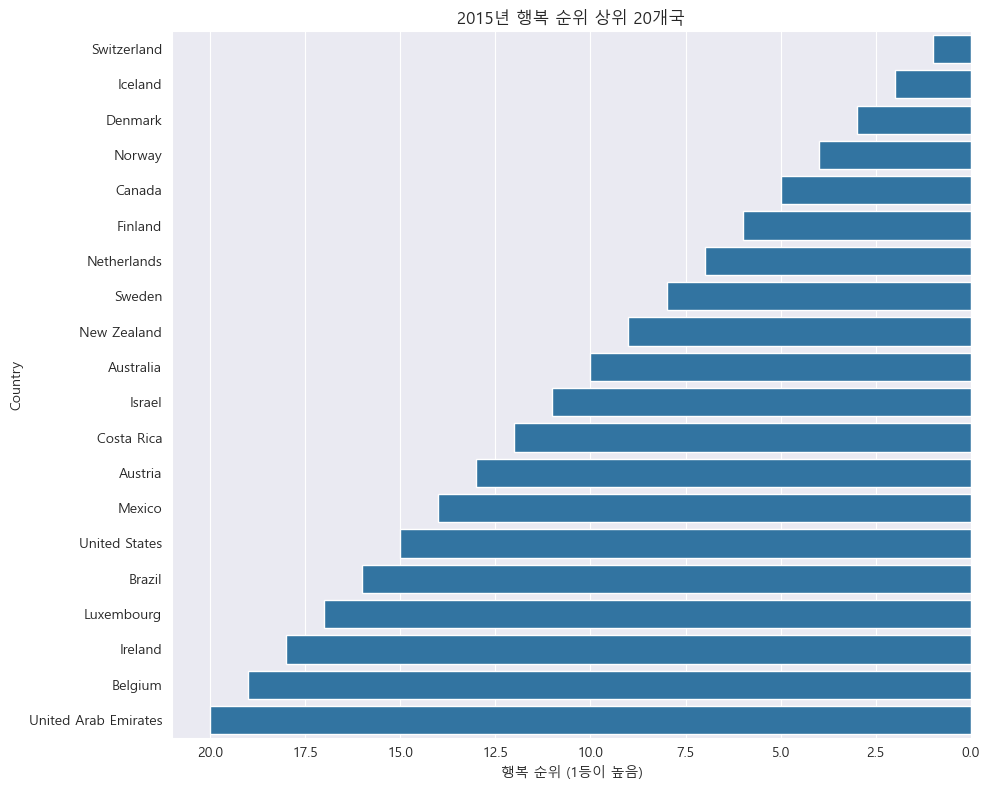

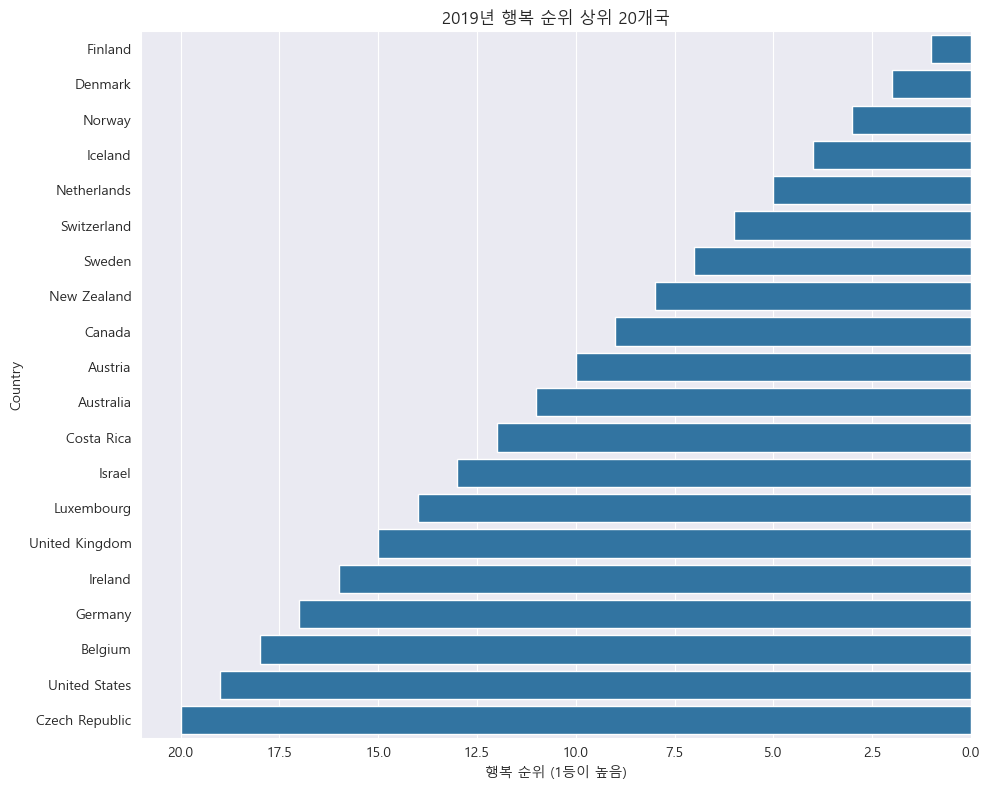

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 순위가 낮을수록 행복한 나라니까 오름차순으로 상위 20개국 추출
top20_2015 = merged_df.nsmallest(20, 'Rank_2015')[['Country', 'Rank_2015']]
top20_2019 = merged_df.nsmallest(20, 'Rank_2019')[['Country', 'Rank_2019']]

# 2015년 상위 20개국 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=top20_2015.sort_values('Rank_2015'), x='Rank_2015', y='Country', )
plt.title('2015년 행복 순위 상위 20개국')
plt.xlabel('행복 순위 (1등이 높음)')
plt.ylabel('Country')
plt.gca().invert_xaxis()  # 순위가 1등이 왼쪽에 오도록 뒤집기
plt.tight_layout()
plt.show()

# 2019년 상위 20개국 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=top20_2019.sort_values('Rank_2019'), x='Rank_2019', y='Country', )
plt.title('2019년 행복 순위 상위 20개국')
plt.xlabel('행복 순위 (1등이 높음)')
plt.ylabel('Country')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()



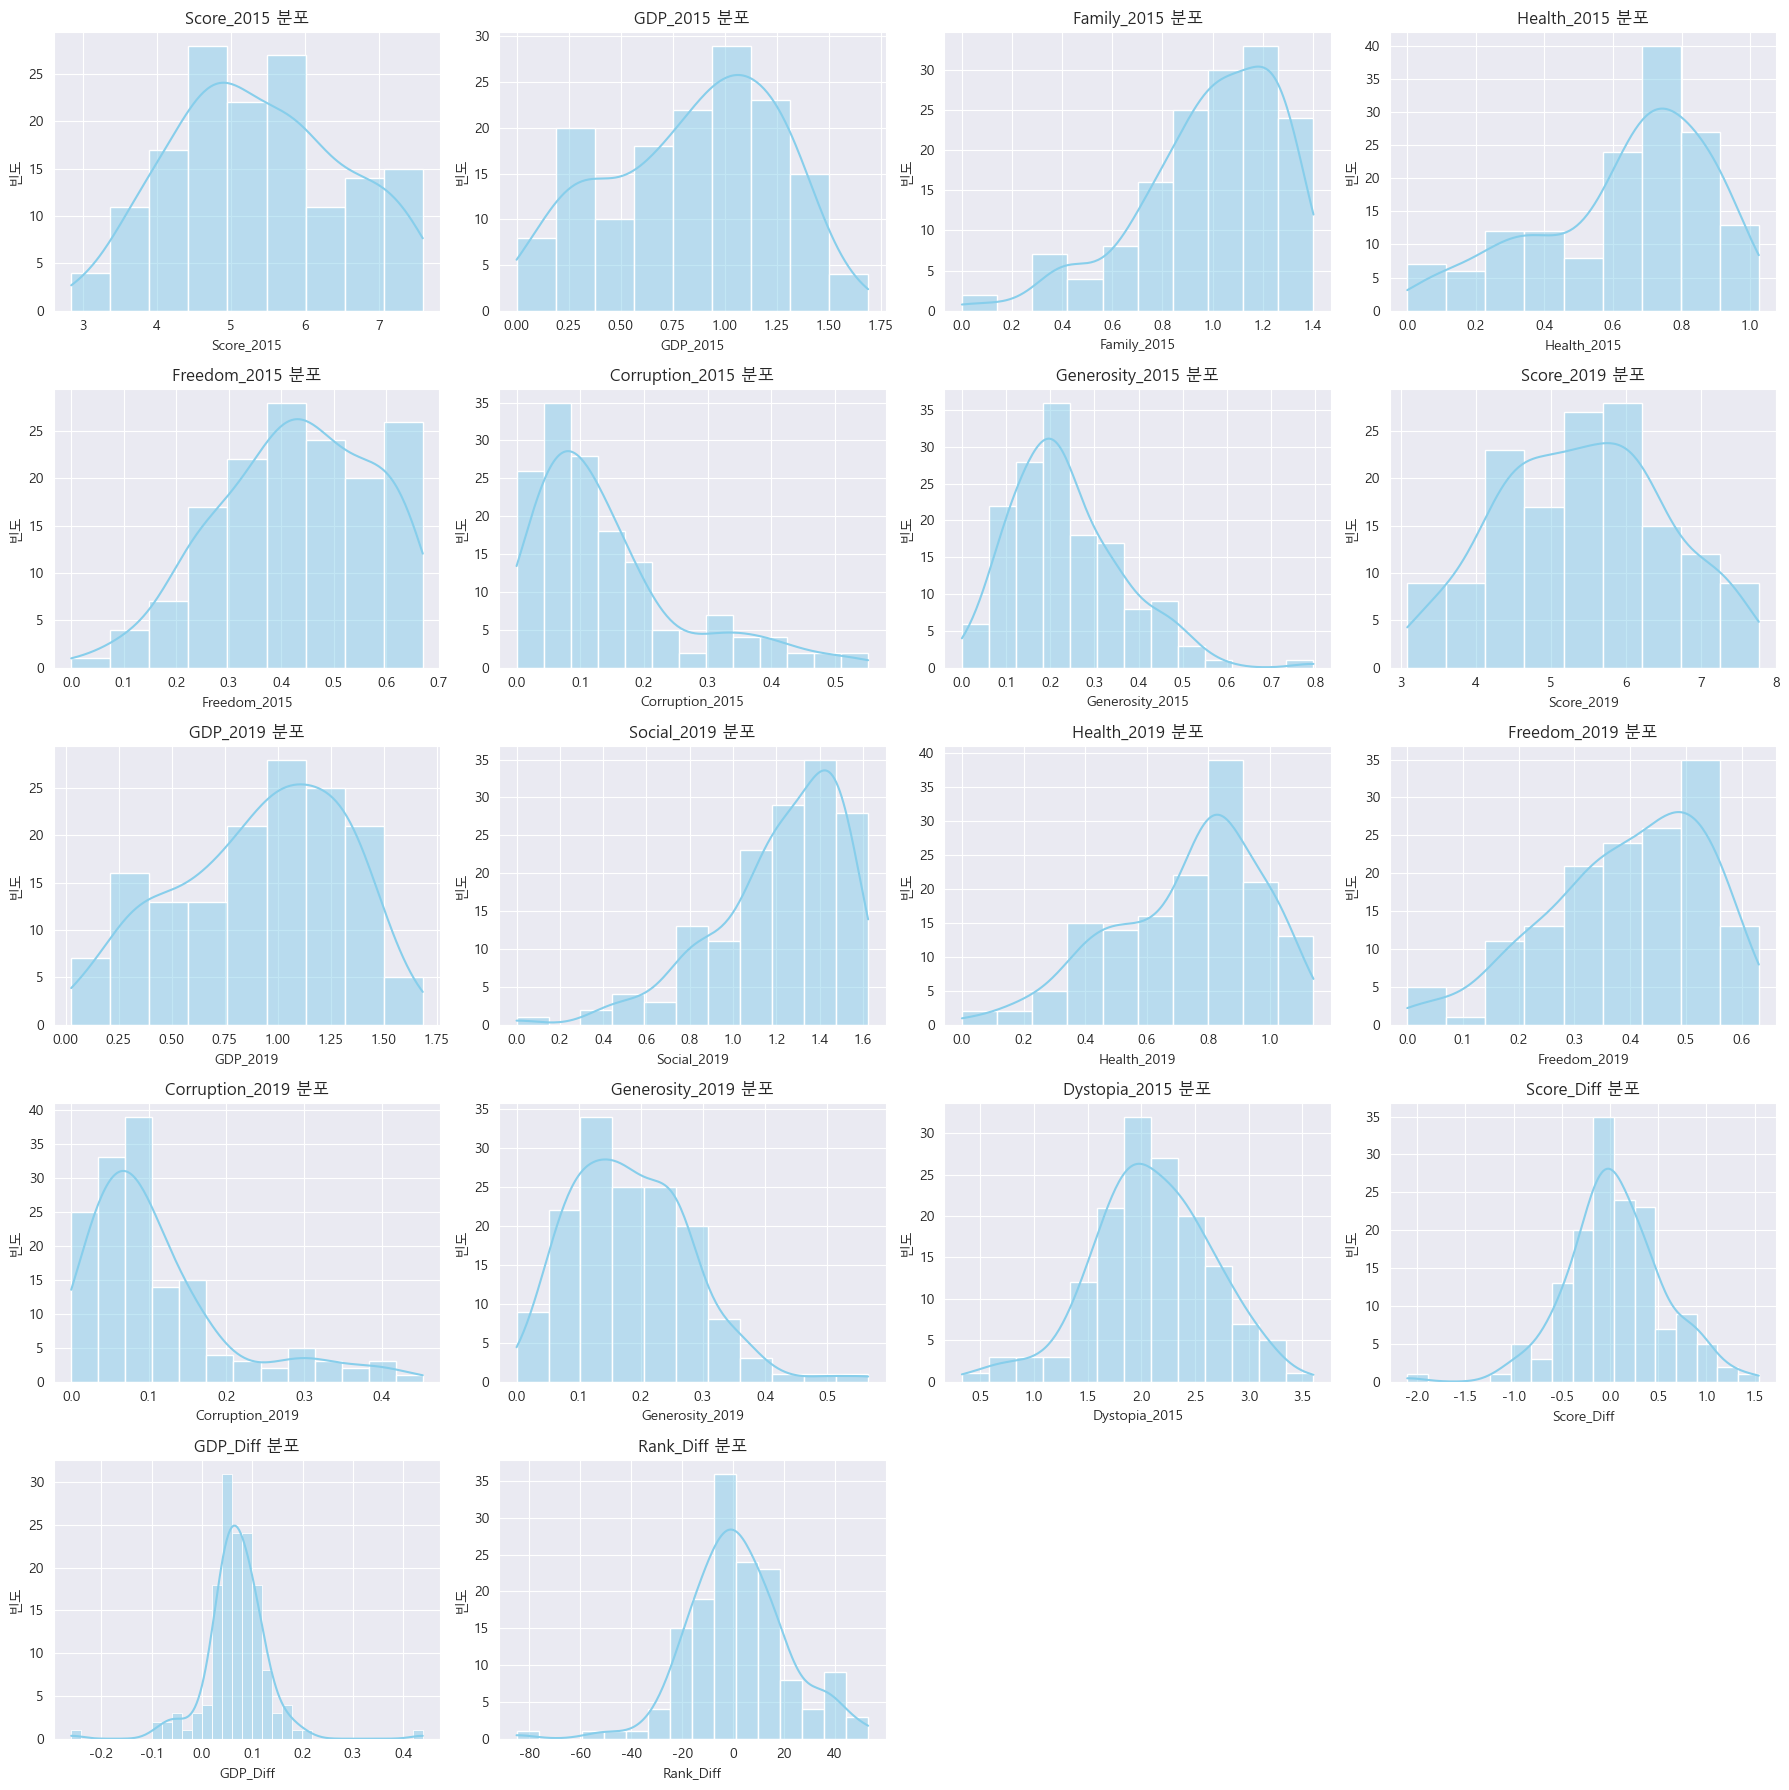

In [26]:
#2015년과 2019년데이터 분포도
num_cols = [
    'Score_2015', 'GDP_2015', 'Family_2015', 'Health_2015',
    'Freedom_2015', 'Corruption_2015', 'Generosity_2015',
    'Score_2019', 'GDP_2019', 'Social_2019', 'Health_2019',
    'Freedom_2019', 'Corruption_2019', 'Generosity_2019','Dystopia_2015',
    'Score_Diff', 'GDP_Diff', 'Rank_Diff'  # ← 변화량은 남긴다
]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 18))

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(merged_df[col], kde=True, color='skyblue')
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')

plt.tight_layout()
plt.show()



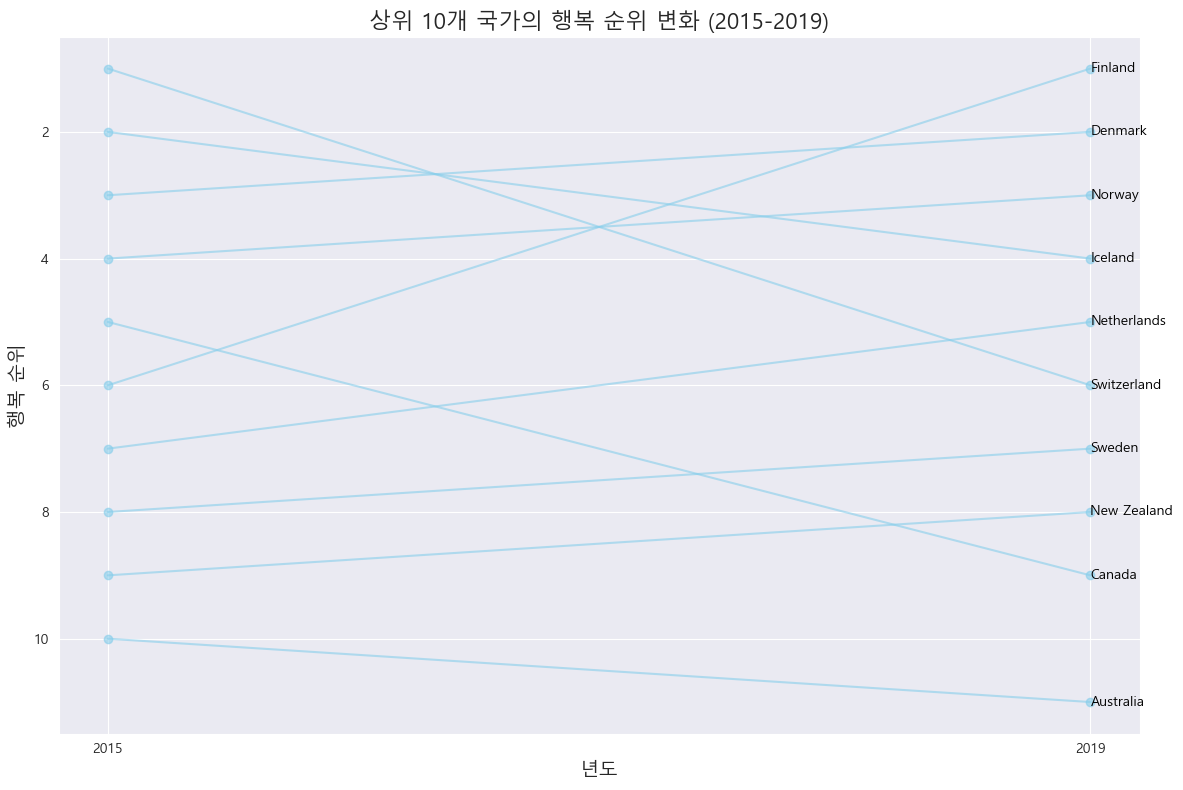

In [27]:
import matplotlib.pyplot as plt

# 상위 10개 국가만 시각화
top_countries = merged_df[['Country', 'Rank_2015', 'Rank_2019']].sort_values(by='Rank_2015').head(10)

plt.figure(figsize=(12, 8))

# 나라별 순위 변화 선 그리기
for i, row in top_countries.iterrows():
    # 선 그리기
    plt.plot([2015, 2019], [row['Rank_2015'], row['Rank_2019']], marker='o', color='skyblue', alpha=0.6)

    # 나라 이름 추가
    plt.text(2019, row['Rank_2019'], row['Country'], color='black', ha='left', va='center')

# 그래프 꾸미기
plt.title('상위 10개 국가의 행복 순위 변화 (2015-2019)', fontsize=16)
plt.xlabel('년도', fontsize=14)
plt.ylabel('행복 순위', fontsize=14)
plt.xticks([2015, 2019])
plt.gca().invert_yaxis()  # 순위는 작을수록 높으므로 Y축을 반전시켜야 함
plt.grid(True)
plt.tight_layout()

plt.show()




In [28]:
# GDP 많이 오른 나라 Top 5
print("📈 GDP 많이 증가한 나라 TOP 5:")
print(merged_df.sort_values(by='GDP_Diff', ascending=False)[['Country', 'GDP_Diff', 'Score_Diff']].head(5))

# 행복도 많이 오른 나라 Top 5
print("\n📈 행복도 많이 오른 나라 TOP 5:")
print(merged_df.sort_values(by='Score_Diff', ascending=False)[['Country', 'Score_Diff', 'GDP_Diff']].head(5))



📈 GDP 많이 증가한 나라 TOP 5:
      Country  GDP_Diff  Score_Diff
120   Myanmar   0.43892       0.053
140    Guinea   0.20583       0.878
136  Tanzania   0.19080      -0.550
122    Malawi   0.17496      -0.882
92       Laos   0.17334      -0.080

📈 행복도 많이 오른 나라 TOP 5:
          Country  Score_Diff  GDP_Diff
145         Benin       1.543   0.10635
141   Ivory Coast       1.289   0.10366
148          Togo       1.246   0.06632
98       Honduras       1.072   0.04668
142  Burkina Faso       1.000   0.07288


## 06. 변수 간 관계 시각화

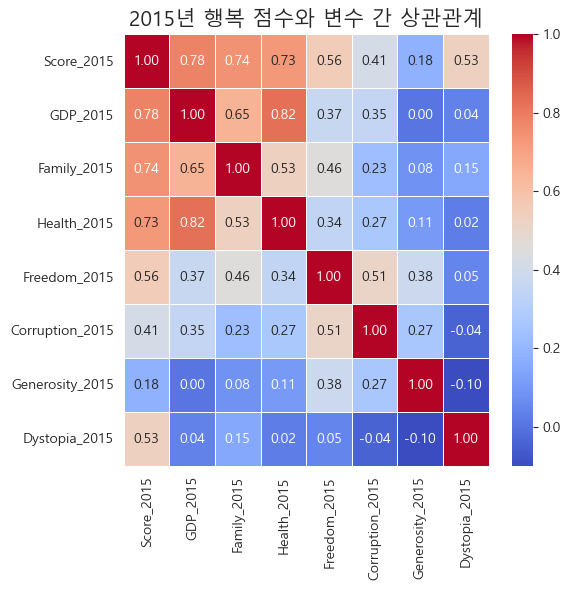

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2015년 관련 변수만 선택
cols_2015 = [
    'Score_2015', 'GDP_2015', 'Family_2015', 'Health_2015',
    'Freedom_2015', 'Corruption_2015', 'Generosity_2015', 'Dystopia_2015'
]

plt.figure(figsize=(6, 6))
sns.heatmap(merged_df[cols_2015].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('2015년 행복 점수와 변수 간 상관관계', fontsize=15)
plt.tight_layout()
plt.show()


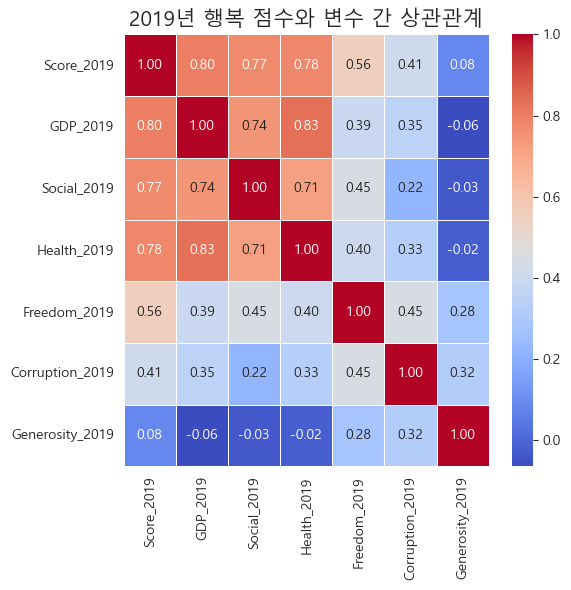

In [30]:
# 2019년 관련 변수만 선택
cols_2019 = [
    'Score_2019', 'GDP_2019', 'Social_2019', 'Health_2019',
    'Freedom_2019', 'Corruption_2019', 'Generosity_2019'
]

plt.figure(figsize=(6, 6))
sns.heatmap(merged_df[cols_2019].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('2019년 행복 점수와 변수 간 상관관계', fontsize=15)
plt.tight_layout()
plt.show()


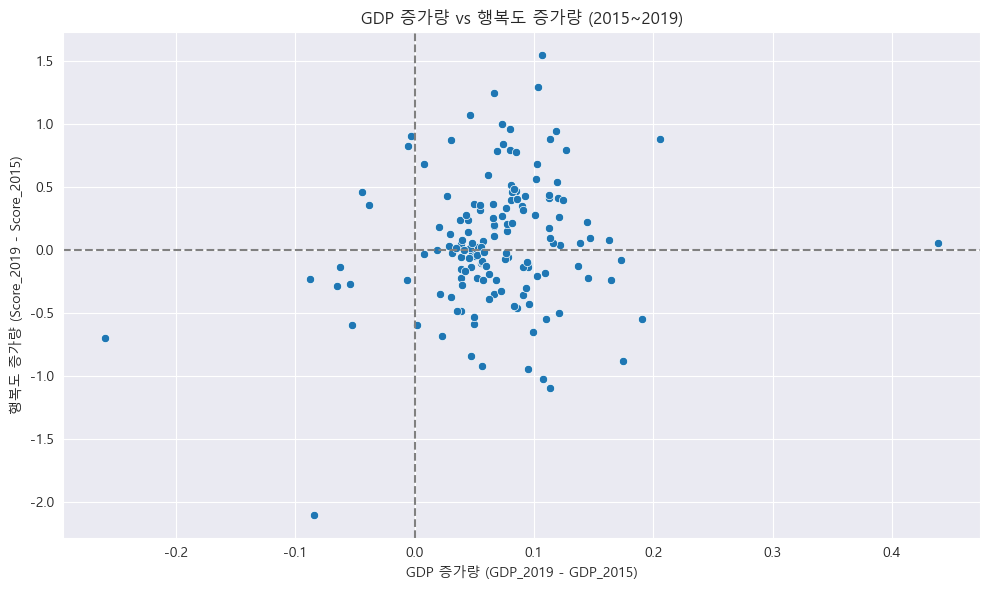

In [31]:
#gdp증가량에 따른 행복도 증가량
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='GDP_Diff', y='Score_Diff')

plt.title('GDP 증가량 vs 행복도 증가량 (2015~2019)')
plt.xlabel('GDP 증가량 (GDP_2019 - GDP_2015)')
plt.ylabel('행복도 증가량 (Score_2019 - Score_2015)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [32]:
correlation = merged_df['GDP_Diff'].corr(merged_df['Score_Diff'])
print(f"GDP 증가량과 행복도 증가량의 상관계수: {correlation:.2f}")
correl = merged_df['Score_2015'].corr(merged_df['GDP_2015'])
print(correl)
#즉, GDP가 오른 국가가 행복도도 오른 경향은
#아주 약하게 보이지만,다른 요인들이 더 큰 영향을 미쳤을 가능성이 높다.

GDP 증가량과 행복도 증가량의 상관계수: 0.17
0.783186013033562


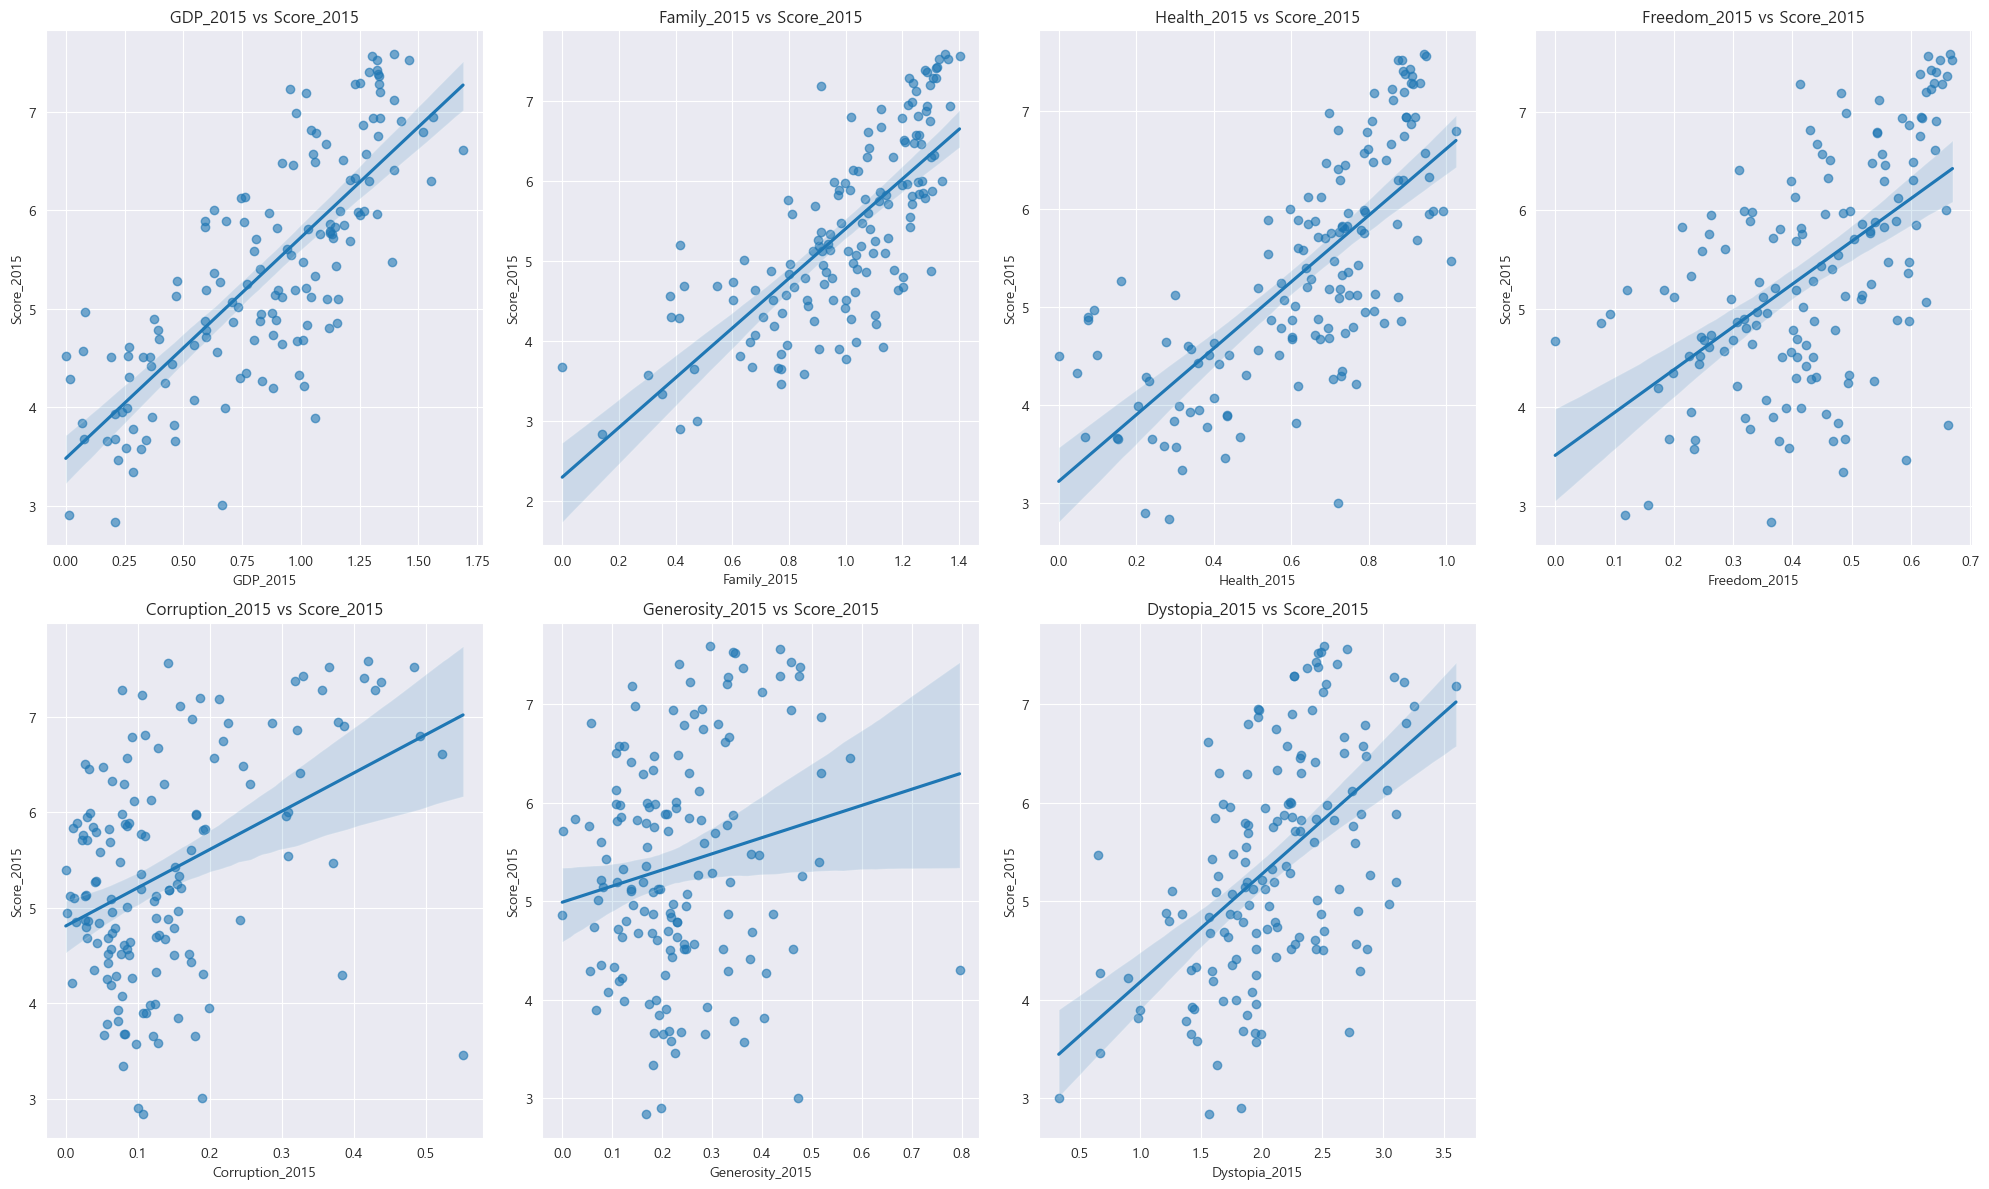

In [33]:
#Dystopia Residual = 디스토피아 사회가 끝난 뒤에도 남아 있는 억압, 불평등, 통제의 흔적


# 디스토피아지수가 높을수록 행복점수가 높은건아니다.
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['GDP_2015', 'Family_2015', 'Health_2015', 'Freedom_2015',
        'Corruption_2015', 'Generosity_2015', 'Dystopia_2015']

plt.figure(figsize=(20, 12))
for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)
    sns.regplot(x=h_merged[col], y=h_merged['Score_2015'], scatter_kws={'alpha': 0.6})
    plt.title(f'{col} vs Score_2015')
plt.tight_layout()
plt.show()


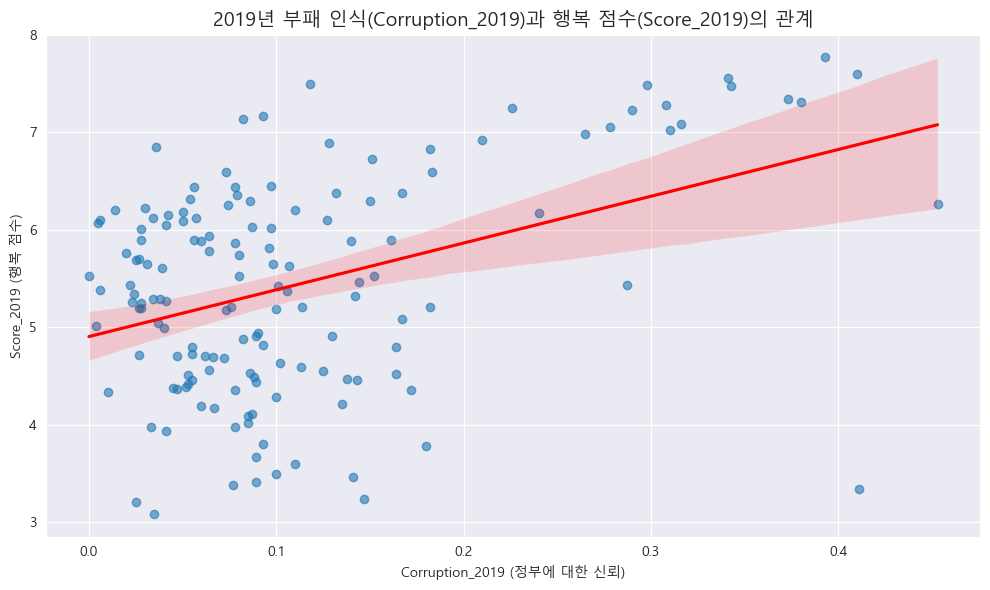

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 산점도 + 회귀선 시각화
sns.regplot(x='Corruption_2019', y='Score_2019', data=h_merged,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('2019년 부패 인식(Corruption_2019)과 행복 점수(Score_2019)의 관계', fontsize=14)
plt.xlabel('Corruption_2019 (정부에 대한 신뢰)')
plt.ylabel('Score_2019 (행복 점수)')
plt.grid(True)
plt.tight_layout()
plt.show()


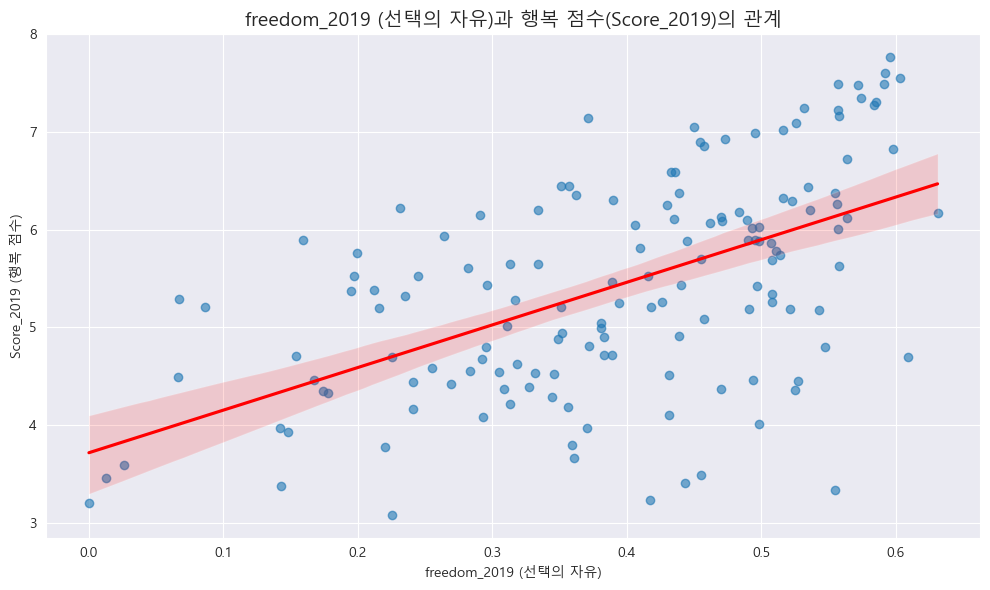

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 산점도 + 회귀선 시각화
sns.regplot(x='Freedom_2019', y='Score_2019', data=h_merged,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('freedom_2019 (선택의 자유)과 행복 점수(Score_2019)의 관계', fontsize=14)
plt.xlabel('freedom_2019 (선택의 자유)')
plt.ylabel('Score_2019 (행복 점수)')
plt.grid(True)
plt.tight_layout()
plt.show()

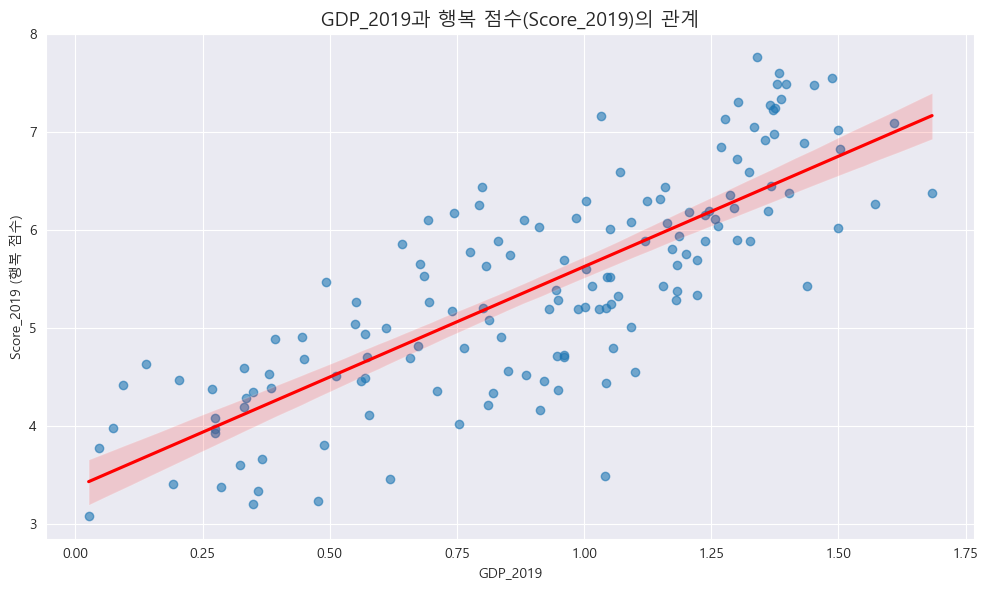

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 산점도 + 회귀선 시각화
sns.regplot(x='GDP_2019', y='Score_2019', data=h_merged,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('GDP_2019과 행복 점수(Score_2019)의 관계', fontsize=14)
plt.xlabel('GDP_2019')
plt.ylabel('Score_2019 (행복 점수)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
corr_2015 = merged_df[['GDP_2015', 'Score_2015']].corr().iloc[0, 1]
corr_2019 = merged_df[['GDP_2019', 'Score_2019']].corr().iloc[0, 1]

print(f"2015년 GDP와 행복 점수 상관계수: {corr_2015:.2f}")
print(f"2019년 GDP와 행복 점수 상관계수: {corr_2019:.2f}")


2015년 GDP와 행복 점수 상관계수: 0.78
2019년 GDP와 행복 점수 상관계수: 0.80


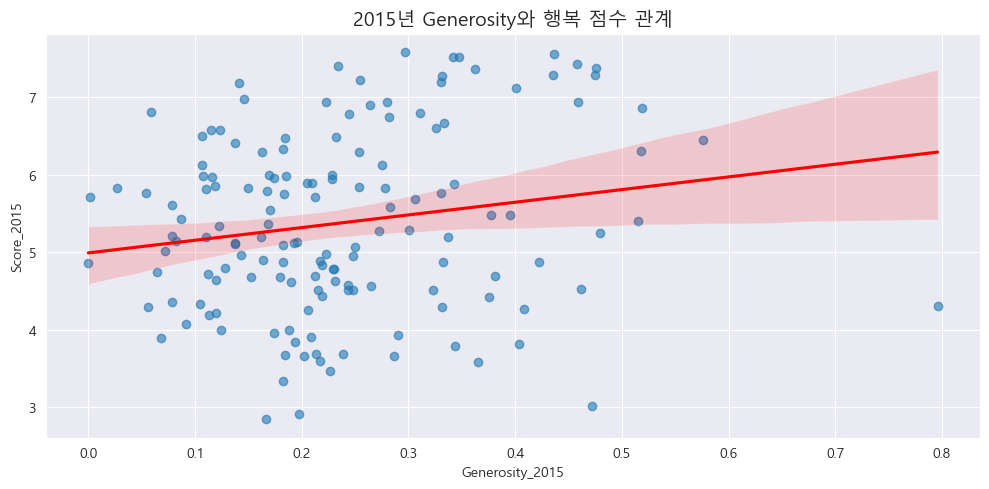

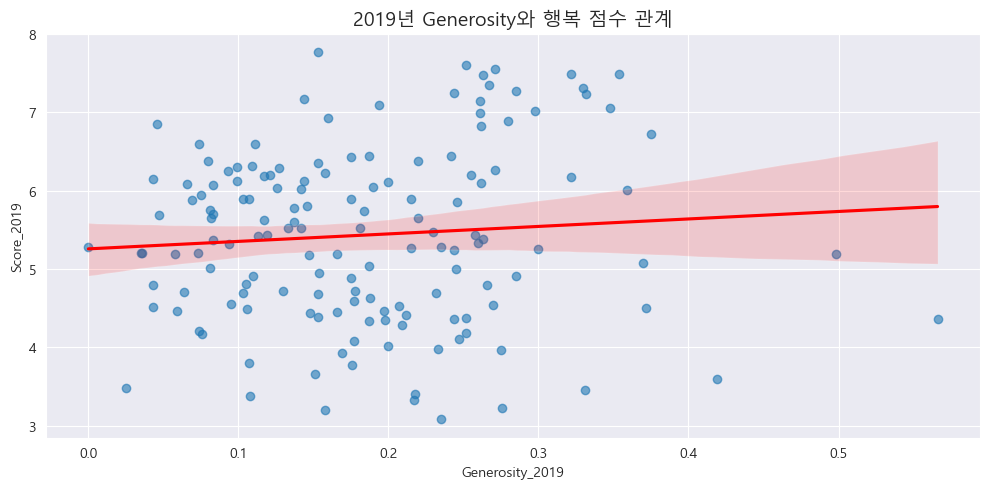

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2015
plt.figure(figsize=(10, 5))
sns.regplot(x='Generosity_2015', y='Score_2015', data=merged_df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('2015년 Generosity와 행복 점수 관계', fontsize=14)
plt.xlabel('Generosity_2015')
plt.ylabel('Score_2015')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2019
plt.figure(figsize=(10, 5))
sns.regplot(x='Generosity_2019', y='Score_2019', data=merged_df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('2019년 Generosity와 행복 점수 관계', fontsize=14)
plt.xlabel('Generosity_2019')
plt.ylabel('Score_2019')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# 평균값 비교
gen_2015_mean = h_merged['Generosity_2015'].mean()
gen_2019_mean = h_merged['Generosity_2019'].mean()

print(f"2015년 평균 Generosity: {gen_2015_mean:.4f}")
print(f"2019년 평균 Generosity: {gen_2019_mean:.4f}")


2015년 평균 Generosity: 0.2369
2019년 평균 Generosity: 0.1845


In [40]:
# 행복 점수 평균도 함께 비교
score_2015_mean = merged_df['Score_2015'].mean()
score_2019_mean = merged_df['Score_2019'].mean()

# 값 출력
print(f"2015년 평균 행복 점수: {score_2015_mean:.4f}")
print(f"2019년 평균 행복 점수: {score_2019_mean:.4f}")



2015년 평균 행복 점수: 5.3783
2019년 평균 행복 점수: 5.4339


# World Happiness Report

#### 1. **프로젝트 개요**
## 세계 행복지수 보고서 데이터
행복지수에 영향을 미치는 요인들이 많은데 어떤 요인이 제일 영향을 미칠까?

내가 생각하기에는 GDP가 제일 영향을 미칠것같은데 실제 데이터는 어떠한가?

https://www.kaggle.com/datasets/unsdsn/world-happiness

2015년데이터와 2019년 데이터를 병합한 데이터 사용

#### 2. **데이터 기본 정보 확인**
- 149행 22열

![image](image/h1.png)


- 각 컬럼명
![image](image/h2.png)

-결측치 없음
![image](image/h3.png)
_

```
merged_df['Score_Diff'] = merged_df['Score_2019'] - merged_df['Score_2015']
```
- **행복 점수(Score)**의 변화량

양수면 👉 2019년에 행복해졌다는 뜻,

음수면 👉 2019년에 행복 점수가 떨어졌다는 뜻

```
merged_df['GDP_Diff'] = merged_df['GDP_2019'] - merged_df['GDP_2015']
```
**1인당 GDP(경제 수준)**의 변화량

양수면 👉 경제가 성장함,

음수면 👉 경제 수준이 하락함을 의미

```
merged_df['Rank_Diff'] = merged_df['Rank_2015'] - merged_df['Rank_2019']
```
양수면 👉 순위가 올라감 (행복해짐)

음수면 👉 순위가 떨어짐 (덜 행복해짐)

#### 3. **기술 통계 및 데이터 요약**


![image](image/h7.png)

#### 4. **데이터 시각화**

## 2015/2019 국가별 상위 20개국 순위
![image](image/h8.png)

![image](image/h9.png)

## 2015/2019 데이터 분포도
![image](image/h10.png)
![image](image/h11.png)
![image](image/h12.png)

## 행복점수가 많이 오른 나라
![image](image/h14.png)
![image](image/h13.png)

## 2015/2019 행복점수 평균
![image](image/h15.png)

### 데이터 간 상관관계
- 2015년

![image](image/h16.png)

- 2019년

![image](image/h17.png)

-gdp가 증가할수록 행복도가 증가한가?
![image](image/h18.png)


![image](image/h19.png)

### 2015년  health,family,gdp,freedon,trust,generosity,distopia,corruption컬럼이 높을수록 행복점수가 높을까??

![image](image/h21.png)
![image](image/h22.png)

## 2019년 부패인식과 행복점수의 관계
![image](image/h23.png)

## 2019년 gdp에따른 행복점수
![image](image/h24.png)
![image](image/h25.png)
-즉 2015년보다 2019년 gdp에따른 행복점수가 높아지는 추세

## 2015/2019 generosity
Generosity 점수는 자선 기부나 이타적 행동을 얼마나 많이 하는지를 수치화한 것

![image](image/h28.png)
![image](image/h26.png)
![image](image/h27.png)

In [41]:
#